In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
crypto_list = ["ADA", "BCH", "BNB", "BTC", "ETC", "ETH", "LINK", "LTC", "XLM", "XRP"]
df_list = {} 
for crypto in crypto_list:
    df_list[crypto] = pd.read_csv(f"{crypto}-USDT.csv") #Dictionnaire contenant les dataframe des 10 crypto
    df_list[crypto]["date"] = pd.to_datetime(df_list[crypto]["date"],unit="ms") #Changement format de la date
    df_list[crypto] = df_list[crypto].set_index("date") #Remplace l'index de base par la colonne date



In [3]:
df_list["BTC"].index.nunique() , len(df_list["BTC"]) #On compare s'il y a des valeurs similaires sur la colonne des index

(51383, 51409)

In [4]:
#On regarde les valeurs qui sont dupliquées
df_list["BTC"].loc[df_list["BTC"].index.duplicated(keep = "last")]

duplicated_data = df_list["BTC"].index.duplicated(keep = "last")
df_list["BTC"] = df_list["BTC"][~ duplicated_data] #On supprime les valeurs en double 

In [5]:
#On généralise pour toute nos crypto de la liste : 
for crypto in crypto_list:
    df_list[crypto] = pd.read_csv(f"{crypto}-USDT.csv") #Dictionnaire contenant les dataframe des 10 crypto
    df_list[crypto]["date"] = pd.to_datetime(df_list[crypto]["date"],unit="ms") #Changement format de la date
    df_list[crypto] = df_list[crypto].set_index("date") #Remplace l'index de base par la colonne date
    duplicated_data = df_list[crypto].index.duplicated(keep = "last")
    df_list[crypto] = df_list[crypto][~ duplicated_data] #On supprime les valeurs en double    

In [6]:
#On veut une seule dataframe regroupant les 10 crypto avec la donnée close : 
df = pd.DataFrame()
for crypto in df_list:
    df[crypto] = df_list[crypto]["close"]
df

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
date,,,,,,,,,,
2018-04-17 04:00:00,0.26664,NaN,12.3000,8030.00,NaN,507.60,NaN,129.62,NaN,NaN
2018-04-17 05:00:00,0.26200,NaN,12.2916,7983.00,NaN,505.56,NaN,129.25,NaN,NaN
2018-04-17 06:00:00,0.25664,NaN,12.2720,8025.01,NaN,507.77,NaN,132.90,NaN,NaN
2018-04-17 07:00:00,0.25698,NaN,12.3982,8138.45,NaN,514.28,NaN,134.80,NaN,NaN
2018-04-17 08:00:00,0.25631,NaN,12.4000,8131.60,NaN,516.42,NaN,136.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,0.29230,292.5,247.2000,30651.25,20.18,1947.85,6.563,111.88,0.1085,0.4824
2023-07-03 07:00:00,0.29420,295.3,249.5000,30667.19,20.34,1966.83,6.633,112.34,0.1093,0.4807
2023-07-03 08:00:00,0.29480,293.7,248.6000,30640.12,20.15,1960.02,6.618,110.66,0.1073,0.4838


In [7]:
#On remarque qu'il y a des Nan pour certaines données donc on va les enlever
df = df.dropna()
df

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
date,,,,,,,,,,
2019-11-28 10:00:00,0.03861,218.98,15.8646,7478.58,3.9335,151.13,2.2359,47.23,0.05817,0.22530
2019-11-28 11:00:00,0.03885,219.04,15.8729,7479.54,3.9456,151.57,2.2518,47.36,0.05818,0.22601
2019-11-28 12:00:00,0.03850,217.53,15.6365,7444.12,3.9143,150.79,2.2173,46.84,0.05803,0.22497
2019-11-28 13:00:00,0.03846,218.29,15.6387,7455.67,3.9326,151.02,2.2101,46.91,0.05789,0.22482
2019-11-28 14:00:00,0.03875,218.67,15.7036,7459.51,3.9387,150.89,2.2335,47.03,0.05803,0.22514
...,...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,0.29230,292.50,247.2000,30651.25,20.1800,1947.85,6.5630,111.88,0.10850,0.48240
2023-07-03 07:00:00,0.29420,295.30,249.5000,30667.19,20.3400,1966.83,6.6330,112.34,0.10930,0.48070
2023-07-03 08:00:00,0.29480,293.70,248.6000,30640.12,20.1500,1960.02,6.6180,110.66,0.10730,0.48380


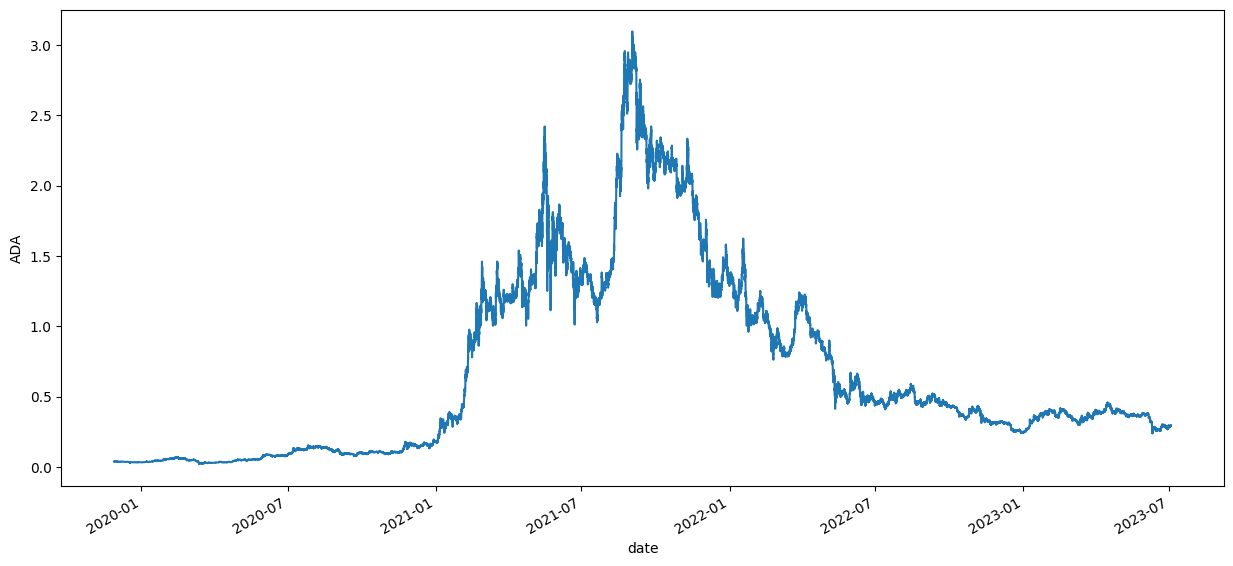

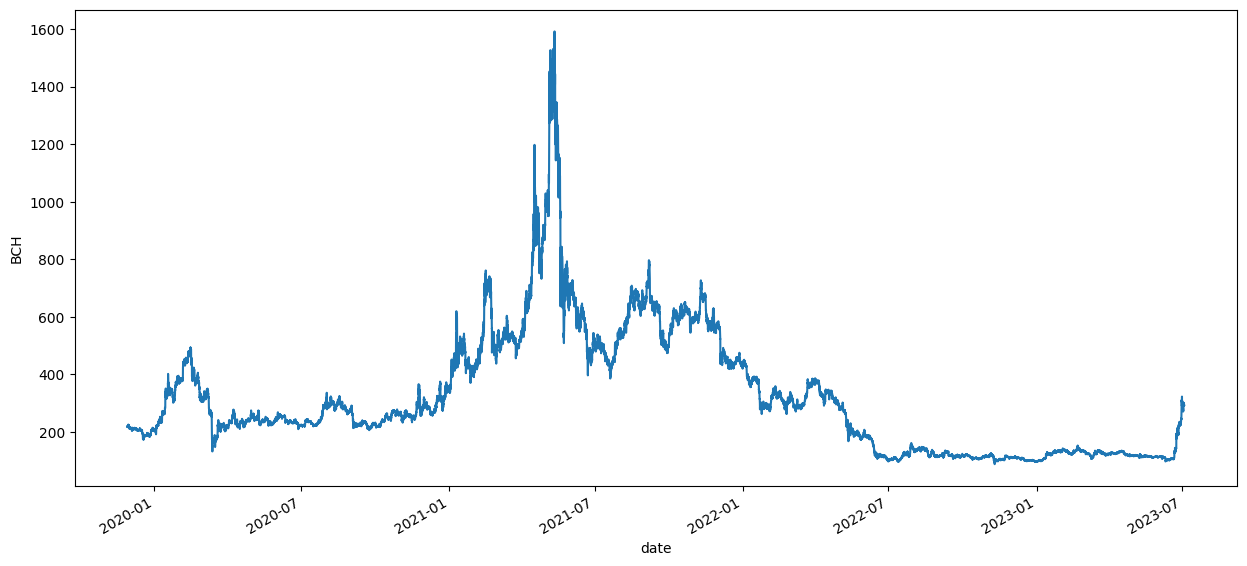

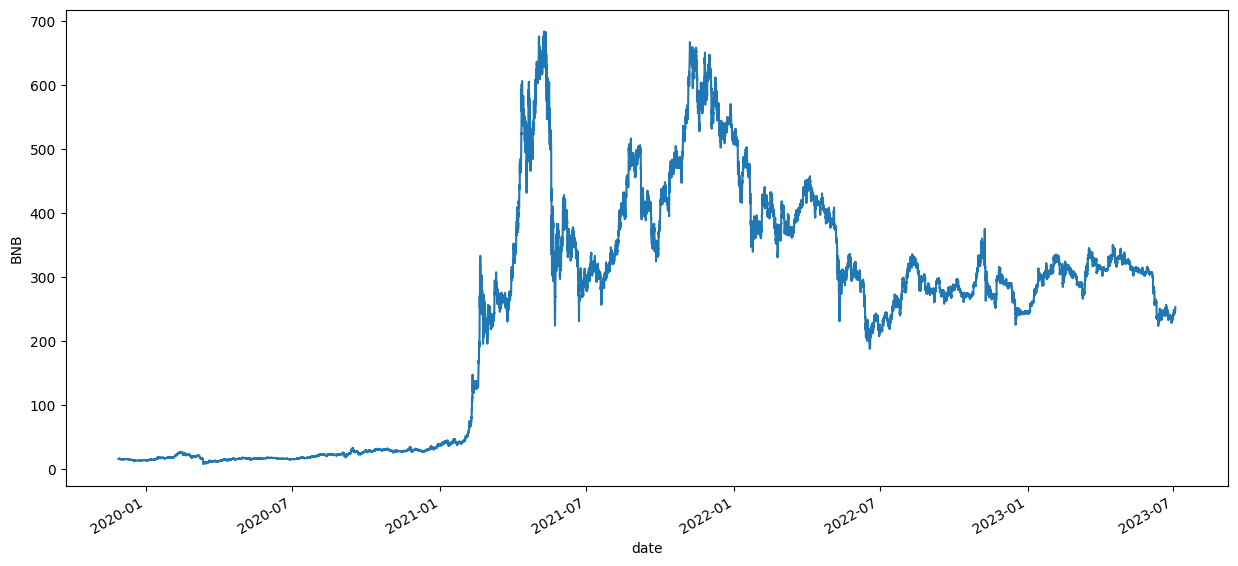

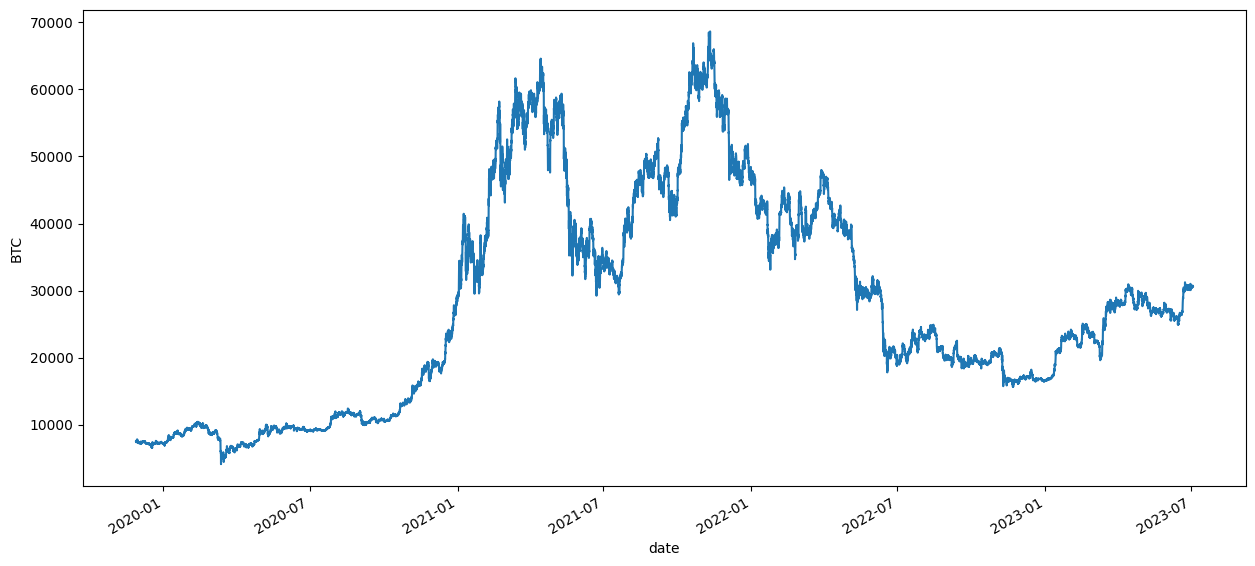

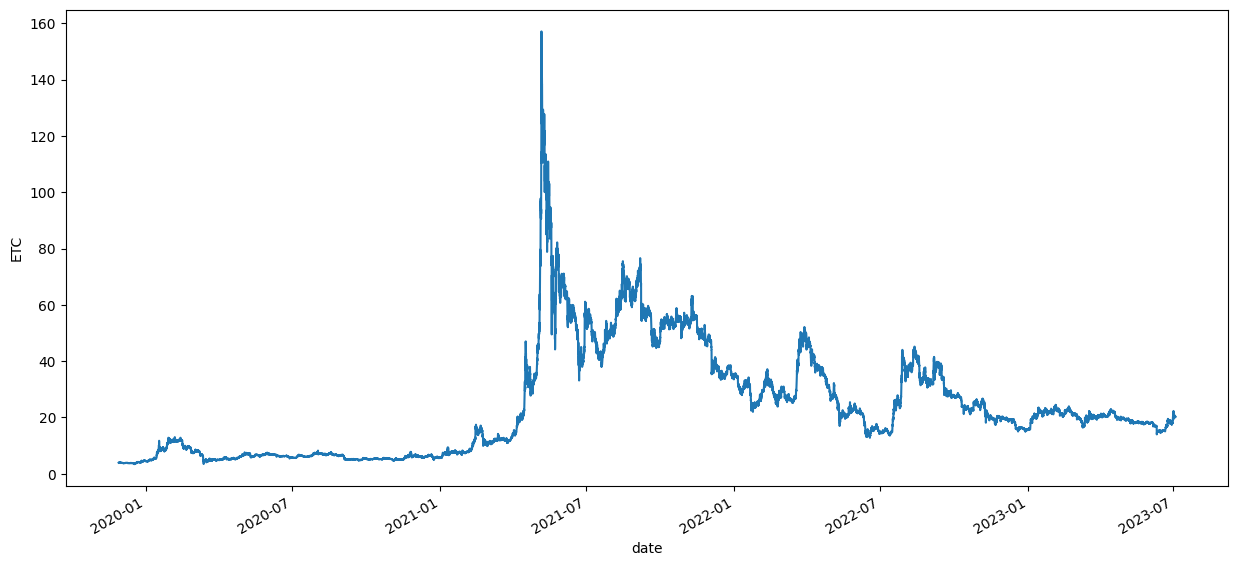

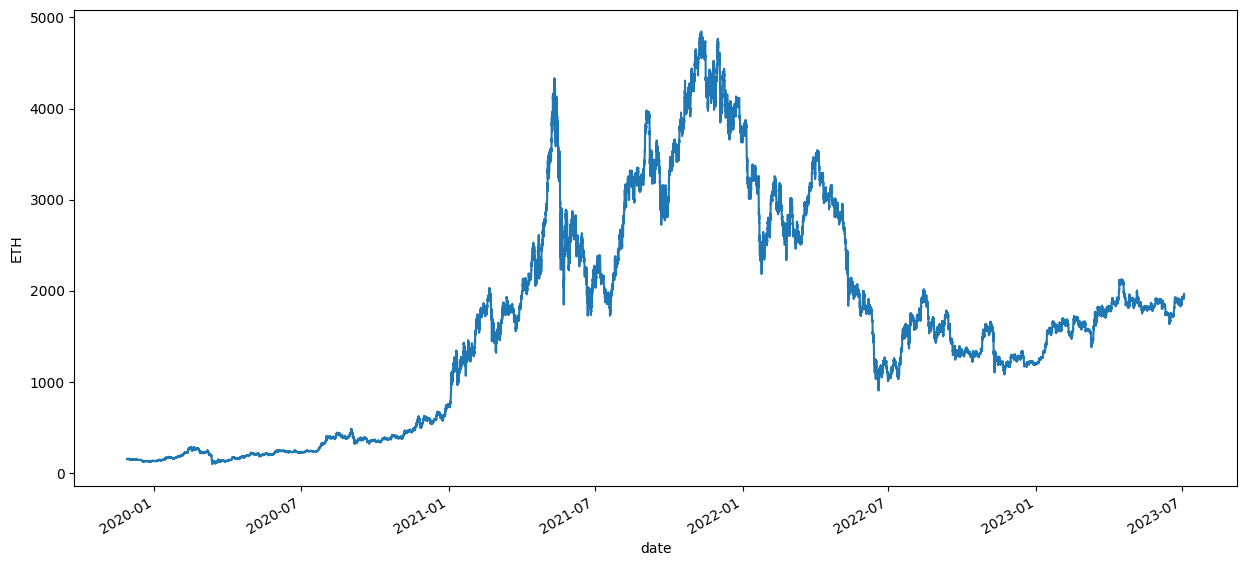

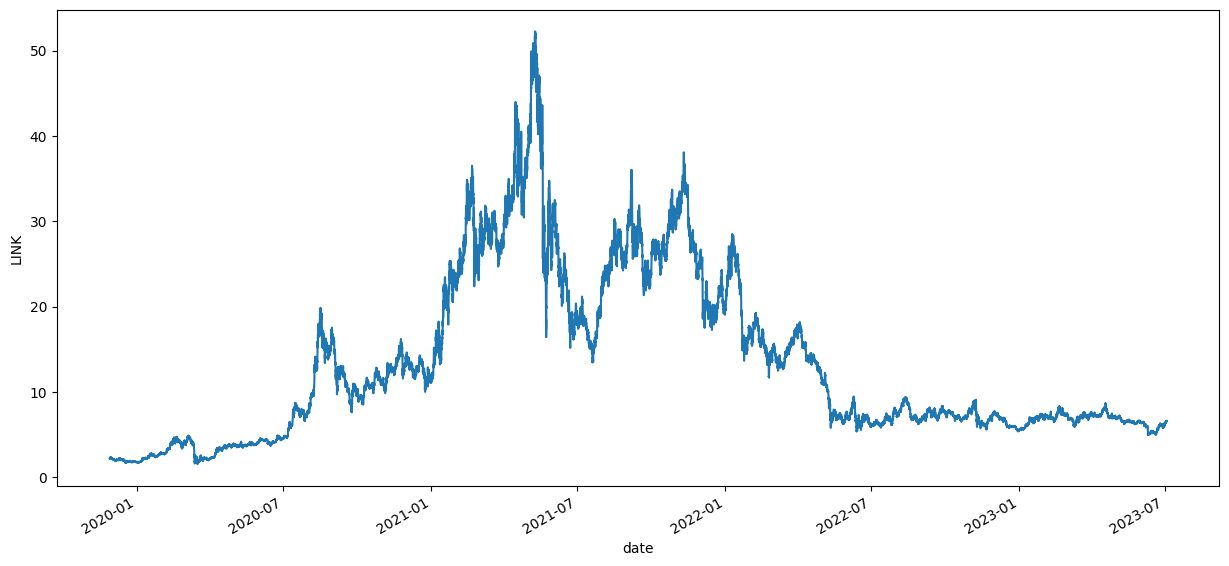

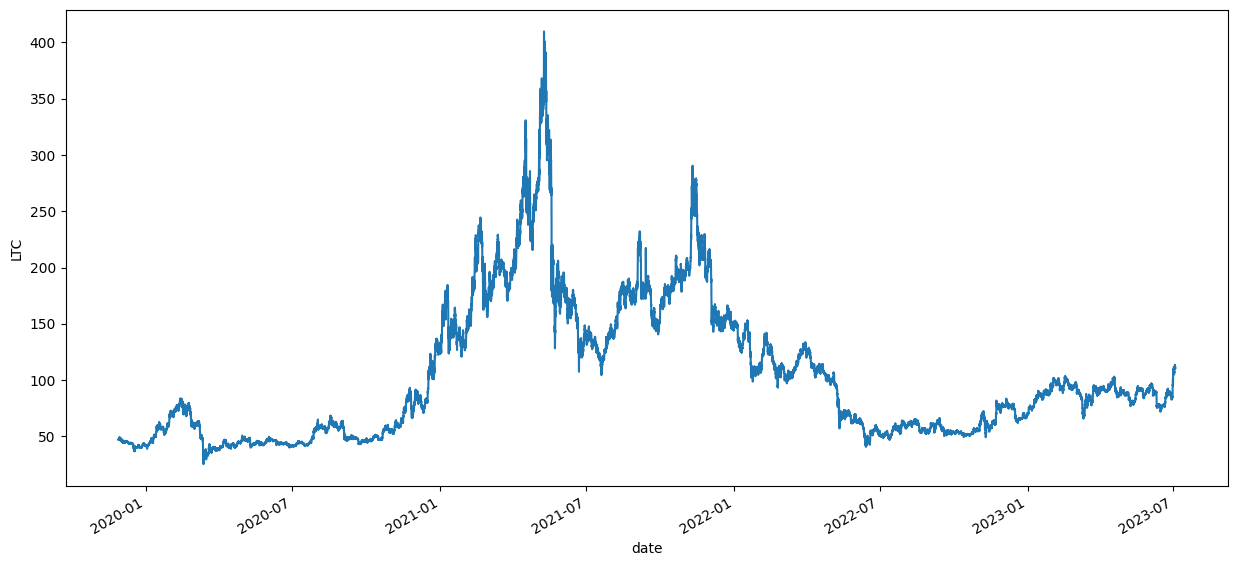

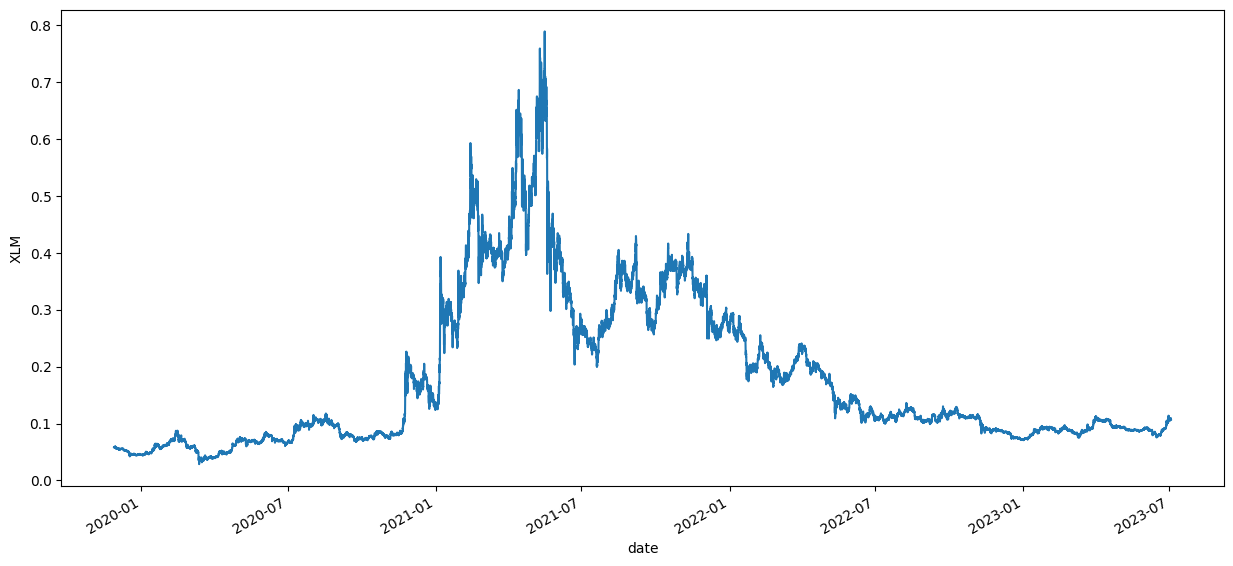

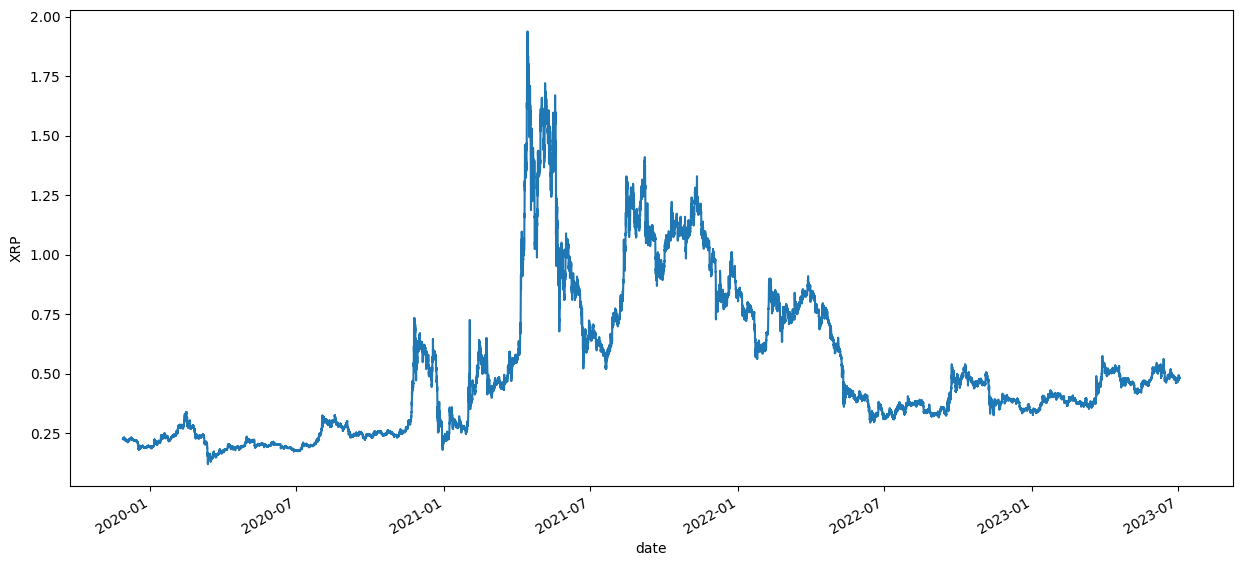

In [8]:
#Affichage des data close en fonction de la date :
for col in df.columns:
    fig, ax = plt.subplots(figsize=(15, 7))
    df[col].plot(label=col)
    ax.set_ylabel(col) # Permet d'afficher le nom de la crypto sur l'axe Y
    plt.show()


In [9]:
df.corr()

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
ADA,1.000000,0.723569,0.782634,0.859911,0.848417,0.869297,0.819000,0.805404,0.803867,0.887277
BCH,0.723569,1.000000,0.430161,0.690909,0.638144,0.532628,0.890495,0.889421,0.896184,0.767310
BNB,0.782634,0.430161,1.000000,0.822675,0.800248,0.939650,0.610371,0.688569,0.619362,0.834212
BTC,0.859911,0.690909,0.822675,1.000000,0.680973,0.896195,0.860330,0.897080,0.870901,0.853319
ETC,0.848417,0.638144,0.800248,0.680973,1.000000,0.820675,0.659701,0.689580,0.662189,0.833492
ETH,0.869297,0.532628,0.939650,0.896195,0.820675,1.000000,0.700819,0.746219,0.686731,0.861432
LINK,0.819000,0.890495,0.610371,0.860330,0.659701,0.700819,1.000000,0.940221,0.960905,0.836123
LTC,0.805404,0.889421,0.688569,0.897080,0.689580,0.746219,0.940221,1.000000,0.953542,0.861605
XLM,0.803867,0.896184,0.619362,0.870901,0.662189,0.686731,0.960905,0.953542,1.000000,0.833596
XRP,0.887277,0.767310,0.834212,0.853319,0.833492,0.861432,0.836123,0.861605,0.833596,1.000000


###        Heatmap des corrélation entre les 10 cryptos

<Axes: >

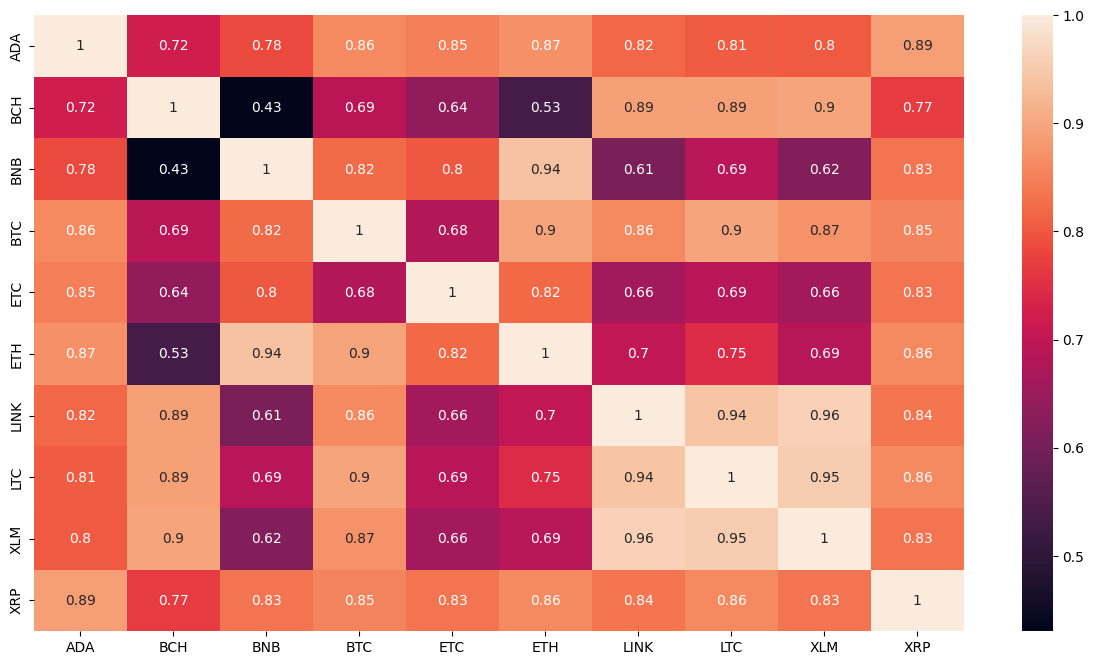

In [10]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
#Si on veut une année en particulier : sns.heatmap(df.loc["2023"].corr(), annot=True)

###        Heatmap des corrélation entre les 10 cryptos avec le pct_change()

<Axes: >

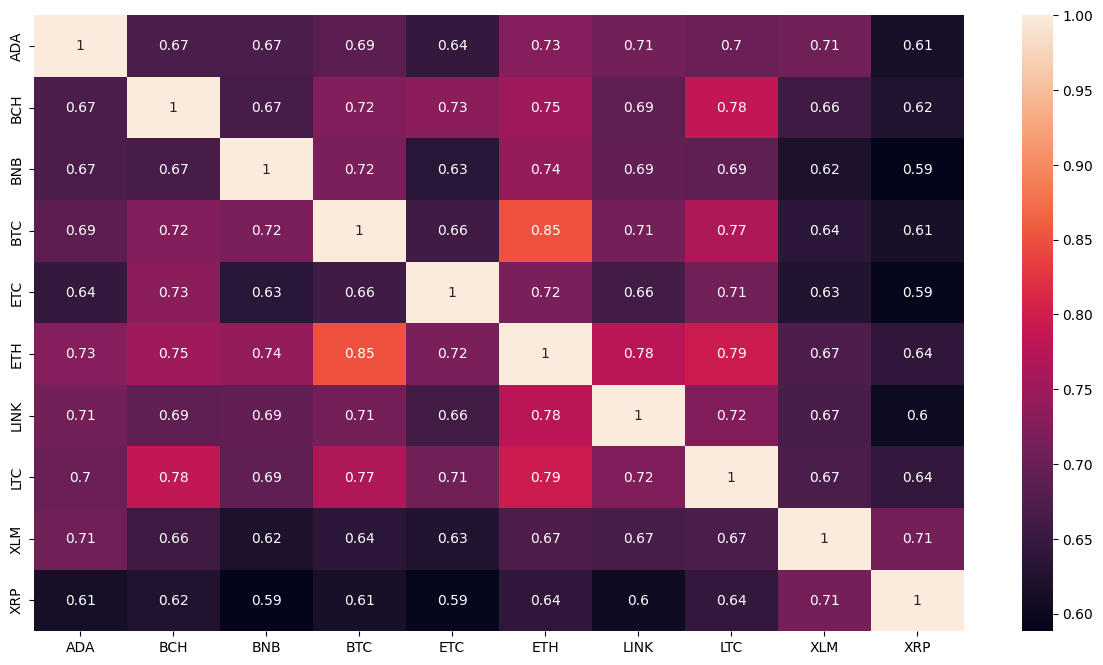

In [11]:
#On regarde le changement entre chauque ligne (10h à 11H...) : 
df_pct = df.pct_change()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_pct.corr(), annot=True)

###        Comparaison du BTC et ETH qui sont très corrélées

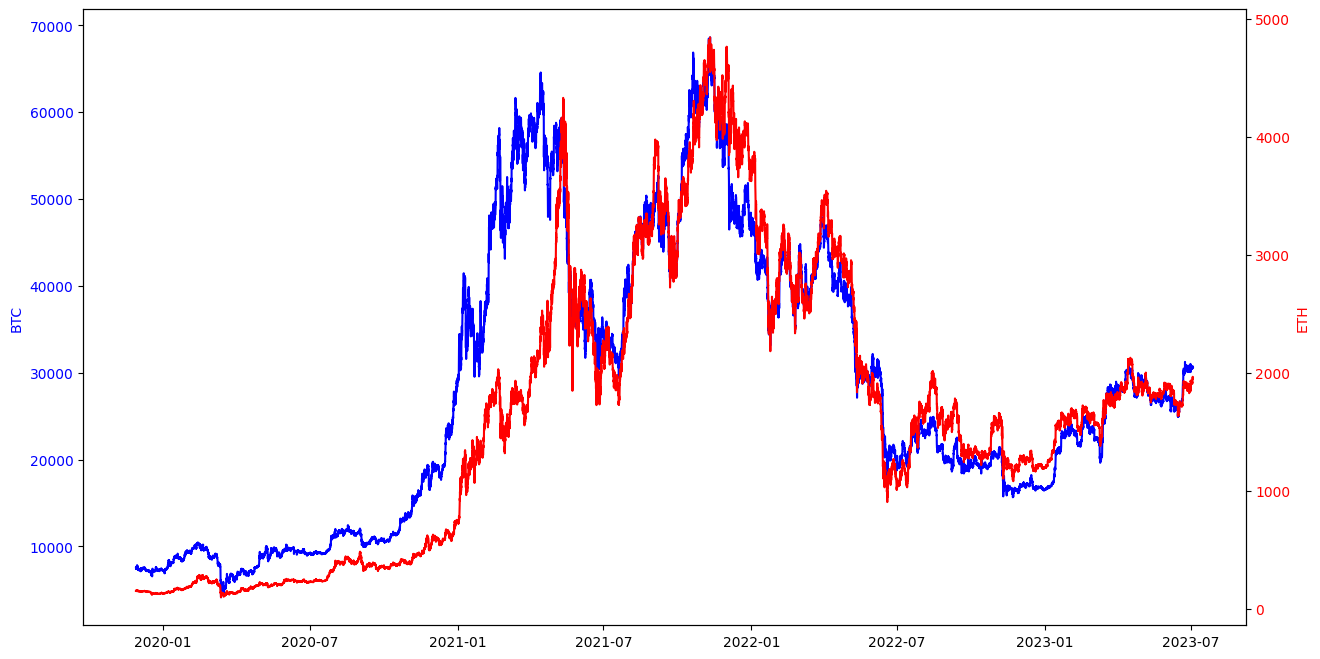

In [12]:
#Comparaison du BTC et ETH qui sont très corrélées: 
fig, ax = plt.subplots(figsize=(15, 8))
data = df.loc[:] #Sur toutes les dates
asset1 = "BTC"
asset2 = "ETH"
# Tracez le premier actif sur l'axe principal
ax.plot(data.index, data[asset1], color='blue')
ax.set_ylabel(asset1, color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Créez un deuxième axe partageant le même axe x
ax2 = ax.twinx()

# Tracez le deuxième actif sur le deuxième axe
ax2.plot(data.index, data[asset2], color='red')
ax2.set_ylabel(asset2, color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()


###        Analyse des rendements moyens et de la volatilité

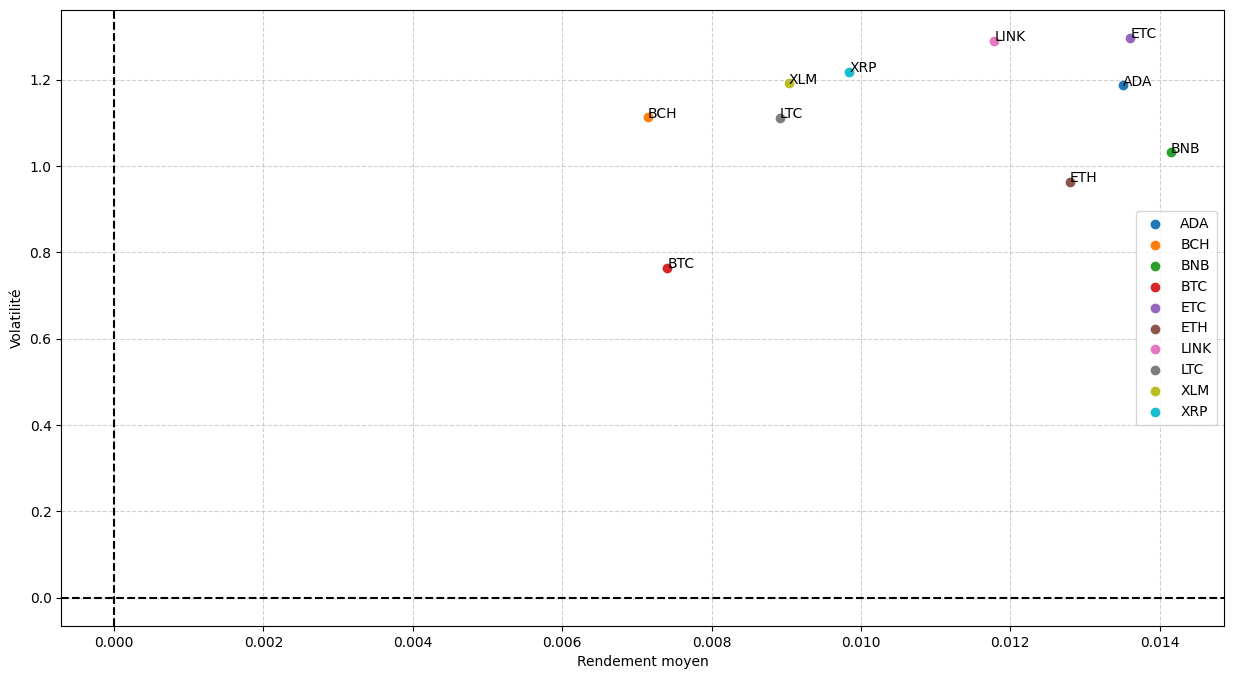

In [13]:
mean_return_list = [] #Liste des rendements
volatility_list = [] # Liste des volatilités
temp_data = df_pct.loc[:] #Copie de la dataframe avec le pct_change
fig, ax = plt.subplots(figsize=(15, 8))
for col in temp_data.columns:
    mean_return = temp_data[col].mean() * 100
    volatility = temp_data[col].std() * 100
    mean_return_list.append(mean_return)
    volatility_list.append(volatility)

    ax.text(mean_return, volatility, col)
    ax.scatter(mean_return, volatility, label=col)

ax.grid(True, linestyle='--', alpha=0.6)
ax.axvline(0, color='black', linestyle='--')
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('Rendement moyen')
ax.set_ylabel('Volatilité')
ax.legend()
plt.show()

### Formule du Ratio de Sharpe

Nous ne pouvons pas parler du ratio rendement/risque sans parler du **ratio de Sharpe**. Le ratio de Sharpe est un ratio très connu en finance qui permet justement de calculer le couple rendement/risque. La formule est :



$$
\text{Sharpe Ratio} = \frac{\text{Moyenne} [R_p]}{\text{Ecart-type} [R_p]} \times \sqrt{N}
$$

- **Rp** : Rendement (en pourcentage)
- **N** : Nombre de périodes par an

Cette formule nous donne un nombre (souvent compris autour de 1). Voici l'interprétation des résultats :

- Si le résultat est **inférieur à 0**, c’est que les rendements sont mauvais.
- Si le résultat est compris **entre 0 et 1**, cela signifie que les risques encourus sont trop importants par rapport aux rendements espérés.
- Si le résultat est **supérieur à 1**, cela signifie que les rendements espérés compensent les risques encourus.


In [14]:
sharpe_ratios = []

temp_data = df_pct.loc[:]

for col in temp_data.columns:
    sharpe_ratio = (8760**0.5)*(temp_data[col].mean()/temp_data[col].std())
    sharpe_ratios.append(sharpe_ratio)
    print(col, sharpe_ratio)


ADA 1.0652078884048417
BCH 0.6007946445423602
BNB 1.2838396574551911
BTC 0.9072830623877229
ETC 0.9818470857671784
ETH 1.2437204766487737
LINK 0.855529740339874
LTC 0.7500566212544104
XLM 0.7096472501733639
XRP 0.7563949295619393


In [15]:
#Création d'une dataframe dont les valeurs sont les Sharpe Ratio
df_sharpe = pd.DataFrame(sharpe_ratios, index=temp_data.columns, columns=['Sharpe Ratio'])
df_sharpe = df_sharpe.sort_values(by='Sharpe Ratio')
df_sharpe

,Sharpe Ratio
BCH,0.600795
XLM,0.709647
LTC,0.750057
XRP,0.756395
LINK,0.855530
BTC,0.907283
ETC,0.981847
ADA,1.065208
ETH,1.243720
BNB,1.283840


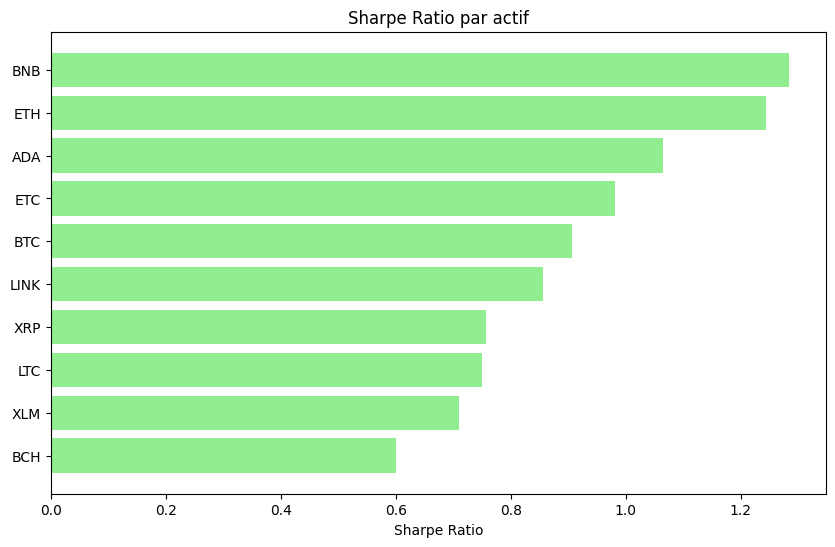

In [16]:
#Affichage des Sharpe Ration avec la dataframe df_sharpe
plt.figure(figsize=(10, 6))
plt.barh(df_sharpe.index, df_sharpe['Sharpe Ratio'], color='lightgreen')
plt.xlabel('Sharpe Ratio')
plt.title('Sharpe Ratio par actif')
plt.show()

### Analyse des drawdowns

Un drawdown est une chute du prix d'un actif depuis son pic le plus élevé. C’est une métrique très importante car elle nous permet d’analyser les plus grandes chutes qu’un actif a connu par le passé. Si un actif a connu un drawdown maximum de -80% alors il faut prendre en compte que lorsque l’on achète cet actif il est possible qu’il perde 80% de sa valeur même si nous le rappellons le passé ne présage pas forcément le futur.

Calcule du drawdown :  Différence entre notre valeur actuelle avec la valeur cumulative maximum et le transformer en pourcentage.

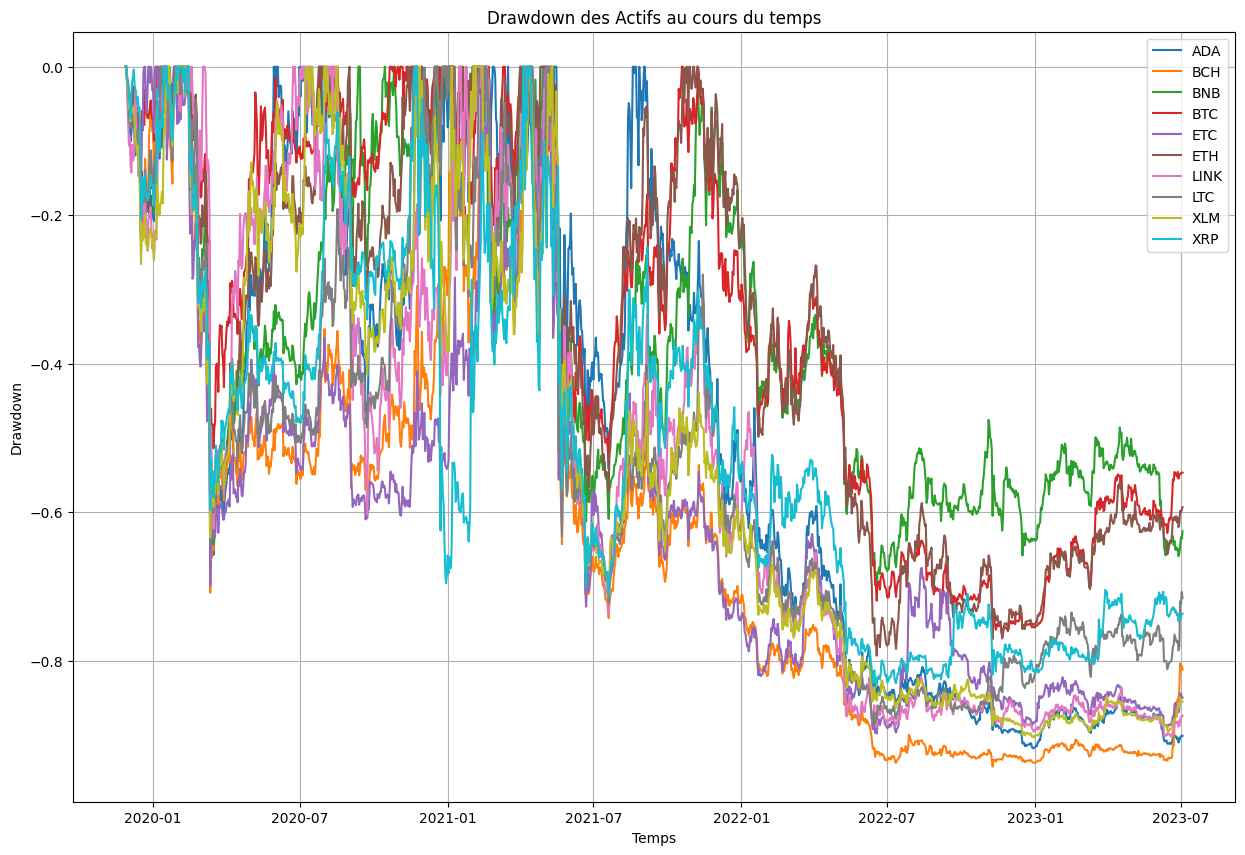

In [17]:
plt.figure(figsize=(15, 10))
temp_data = df.resample('D').last() #Transforme nos données horaires en données journalières puis prend la dernière valeur
for col in crypto_list:
    running_max = temp_data[col].cummax() # Cummax = Prend de manière roulante la valeur la plus haute atteinte
    drawdown = (temp_data[col] - running_max) / running_max #Drowdown est calculé de manière jounalière d'où le df.resemple('D')
    plt.plot(drawdown, label=col)

plt.title('Drawdown des Actifs au cours du temps')
plt.xlabel('Temps')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

###        Analyse des rendements moyens et de le drawdown max

In [18]:
crypto_list = ["ADA", "BCH", "BNB", "BTC", "ETC", "ETH", "LINK", "LTC", "XLM", "XRP"]
dict_draw = {}
temp_data = df.resample('D').last()

for col in crypto_list:
    running_max = temp_data[col].cummax() # Cummax = Prend de manière roulante la valeur la plus haute atteinte
    drawdown = (temp_data[col] - running_max) / running_max #Drowdown est calculé de manière jounalière d'où le df.resemple('D')
    dict_draw[col] = drawdown
dict_draw

{'ADA': date
 2019-11-28    0.000000
 2019-11-29    0.000000
 2019-11-30   -0.023019
 2019-12-01   -0.041434
 2019-12-02   -0.080930
                 ...   
 2023-06-29   -0.907215
 2023-06-30   -0.903270
 2023-07-01   -0.901416
 2023-07-02   -0.901686
 2023-07-03   -0.900944
 Freq: D, Name: ADA, Length: 1314, dtype: float64,
 'BCH': date
 2019-11-28    0.000000
 2019-11-29    0.000000
 2019-11-30   -0.029241
 2019-12-01   -0.043036
 2019-12-02   -0.046116
                 ...   
 2023-06-29   -0.836253
 2023-06-30   -0.803426
 2023-07-01   -0.811762
 2023-07-02   -0.806657
 2023-07-03   -0.811374
 Freq: D, Name: BCH, Length: 1314, dtype: float64,
 'BNB': date
 2019-11-28    0.000000
 2019-11-29    0.000000
 2019-11-30   -0.031815
 2019-12-01   -0.049199
 2019-12-02   -0.067741
                 ...   
 2023-06-29   -0.655254
 2023-06-30   -0.644605
 2023-07-01   -0.633365
 2023-07-02   -0.635436
 2023-07-03   -0.625527
 Freq: D, Name: BNB, Length: 1314, dtype: float64,
 'BTC': date
 20

In [19]:
crypto_list = ["ADA", "BCH", "BNB", "BTC", "ETC", "ETH", "LINK", "LTC", "XLM", "XRP"]
df_drawdown = pd.DataFrame()
for crypto in crypto_list:
    df_drawdown[crypto] = dict_draw[crypto]
df_drawdown

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
date,,,,,,,,,,
2019-11-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-11-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-11-30,-0.023019,-0.029241,-0.031815,-0.025555,-0.033525,-0.020703,-0.044011,-0.027400,-0.029162,-0.019480
2019-12-01,-0.041434,-0.043036,-0.049199,-0.045065,-0.036492,-0.024843,-0.075418,-0.022456,-0.029671,-0.022654
2019-12-02,-0.080930,-0.046116,-0.067741,-0.057548,-0.054714,-0.038300,-0.106482,-0.063659,-0.056460,-0.047135
...,...,...,...,...,...,...,...,...,...,...
2023-06-29,-0.907215,-0.836253,-0.655254,-0.549101,-0.865386,-0.614809,-0.887295,-0.781511,-0.861022,-0.741263
2023-06-30,-0.903270,-0.803426,-0.644605,-0.548736,-0.843722,-0.597796,-0.879221,-0.719701,-0.849316,-0.742244
2023-07-01,-0.901416,-0.811762,-0.633365,-0.547049,-0.844021,-0.599728,-0.875586,-0.723827,-0.853672,-0.742080


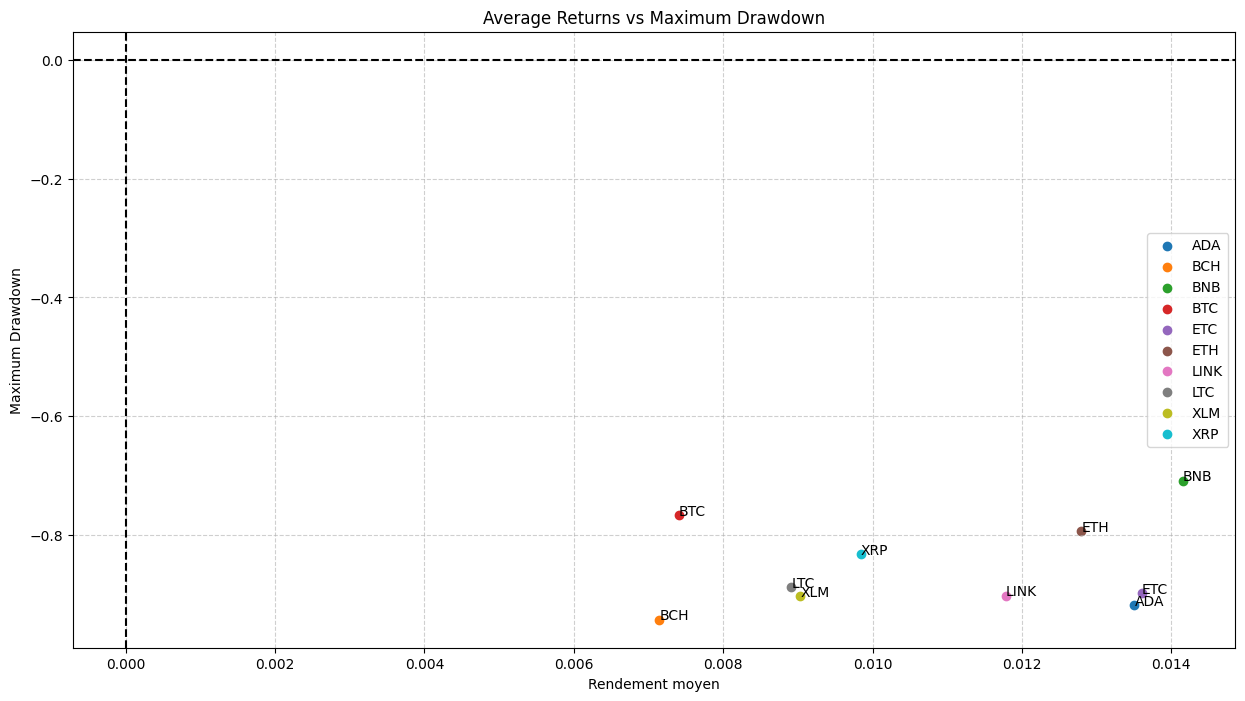

In [20]:
mean_return_list = [] #Liste des rendements
drawdown_list = [] # Liste des drawdown
temp_data = df_pct.loc[:] #Copie de la dataframe avec le pct_change
fig, ax = plt.subplots(figsize=(15, 8))
for col in temp_data.columns:
    mean_return = temp_data[col].mean() * 100
    ddrr = df_drawdown[col].min()
    mean_return_list.append(mean_return)
    drawdown_list.append(ddrr)

    ax.text(mean_return, ddrr, col)
    ax.scatter(mean_return, ddrr, label=col)

ax.grid(True, linestyle='--', alpha=0.6)
ax.axvline(0, color='black', linestyle='--')
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('Rendement moyen')
ax.set_ylabel('Maximum Drawdown')
ax.legend()
plt.title('Average Returns vs Maximum Drawdown')
plt.show()

In [21]:
# Counting number of drawdowns exceeding 10%
def count_drawdowns(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return (drawdown <= -0.1).sum()

drawdown_counts = df.apply(count_drawdowns)

# Printing drawdown counts
print("Number of Drawdowns Exceeding 10%:")
print(drawdown_counts)

Number of Drawdowns Exceeding 10%:
ADA     26933
BCH     29552
BNB     27352
BTC     23394
ETC     29523
ETH     25067
LINK    28003
LTC     28625
XLM     28963
XRP     29765
dtype: int64
